<a href="https://colab.research.google.com/github/CLXKON001/INF3003W_Tutorial_Streamlit/blob/main/Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# If you work with Google Colaboratory, please run this as well.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Specify the directory where this notebook is located after %cd.
%cd "/content/drive/MyDrive/GCI Global 2025/final assignment"

/content/drive/MyDrive/GCI Global 2025/final assignment


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import os
from pathlib import Path
# Automatically get the current working directory
current_dir = Path(os.getcwd())

# Define file paths using pathlib
train_file = current_dir / "input" / "train.csv"
test_file = current_dir / "input" / "test.csv"
sample_sub_file = current_dir / "input" / "data.csv"

# Check if path exists
if train_file.exists() and test_file.exists() and sample_sub_file.exists():
    print("All files exist and path is correctly set.")
else:
    print("Some files are missing or path is not correctly set.")

All files exist and path is correctly set.


In [25]:
import os

input_dir = "/content/drive/MyDrive/GCI Global 2025/final assignment/input"

if os.path.exists(input_dir):
    print(f"Contents of '{input_dir}':")
    for item in os.listdir(input_dir):
        print(item)
else:
    print(f"The directory '{input_dir}' does not exist.")


Contents of '/content/drive/MyDrive/GCI Global 2025/final assignment/input':
data.csv


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Define the path to the input directory
input_dir = "/content/drive/MyDrive/GCI Global 2025/final assignment/input"

# Load the main dataset (assuming data.csv is your full dataset)
data_file = os.path.join(input_dir, "data.csv")
df_original = pd.read_csv(data_file)

# Display the first few rows and shape of the original data
print(f"Original data shape: {df_original.shape}")
display(df_original.head())


Original data shape: (1470, 44)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,2,3029,3,2,0,0,0,0,3,2023


In [27]:
# Assuming 'TARGET' is your target column. Adjust if different.
# If you don't have a specific target column yet, you can skip this part
# or choose a column to be a placeholder for now.

if 'TARGET' not in df_original.columns:
    print("Warning: 'TARGET' column not found. Creating a dummy 'TARGET' column for demonstration.")
    print("Please replace this with your actual target column later.")
    df_original['TARGET'] = (df_original['Attrition'] == 'Yes').astype(int) # Example using 'Attrition'

X = df_original.drop('TARGET', axis=1, errors='ignore') # Features
y = df_original['TARGET'] # Target

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Recombine features and target for saving as train.csv and test.csv
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save the split datasets to the 'input' directory
train_output_path = os.path.join(input_dir, "train.csv")
test_output_path = os.path.join(input_dir, "test.csv")

train_df.to_csv(train_output_path, index=False)
test_df.to_csv(test_output_path, index=False)

print(f"train.csv created at: {train_output_path} (Shape: {train_df.shape})")
print(f"test.csv created at: {test_output_path} (Shape: {test_df.shape})")

# Display the first few rows of the created train and test datasets
print("\nTrain data head:")
display(train_df.head())
print("\nTest data head:")
display(test_df.head())


Please replace this with your actual target column later.
train.csv created at: /content/drive/MyDrive/GCI Global 2025/final assignment/input/train.csv (Shape: (1176, 45))
test.csv created at: /content/drive/MyDrive/GCI Global 2025/final assignment/input/test.csv (Shape: (294, 45))

Train data head:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year,TARGET
517,25,No,Travel_Rarely,Sales,8,3,Life Sciences,1,707,4,...,5934,3,3,1,0,0,1,2,2023,0
317,52,No,Travel_Rarely,Research & Development,8,4,Medical,1,433,3,...,9734,2,4,1,1,1,1,4,2023,0
78,37,No,Travel_Rarely,Research & Development,7,4,Medical,1,102,1,...,8639,3,1,0,0,0,0,2,2024,0
1287,42,No,Travel_Rarely,Research & Development,13,3,Medical,1,1803,2,...,6332,3,3,1,0,0,1,2,2023,0
299,51,No,Travel_Rarely,Research & Development,2,3,Medical,1,408,4,...,9734,2,1,1,0,0,0,1,2023,0



Test data head:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year,TARGET
1393,27,No,Travel_Rarely,Sales,9,3,Marketing,1,1965,4,...,6604,2,3,1,1,0,1,2,2023,0
1034,45,No,Travel_Rarely,Research & Development,20,3,Medical,1,1460,2,...,9269,3,2,0,0,0,1,3,2023,0
962,51,No,Travel_Rarely,Human Resources,5,3,Life Sciences,1,1352,3,...,7226,3,3,1,0,0,0,3,2024,0
156,51,No,Travel_Rarely,Research & Development,7,4,Medical,1,211,2,...,7829,1,2,1,1,0,0,1,2023,0
780,28,Yes,Non-Travel,Research & Development,24,2,Technical Degree,1,1082,2,...,4842,5,1,0,0,0,0,3,2023,1


In [28]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
sample_sub = pd.read_csv(sample_sub_file)

In [35]:
# Check train data
print(f"train shape: {train.shape}")
train.head(3)

train shape: (1176, 45)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year,TARGET
0,25,No,Travel_Rarely,Sales,8,3,Life Sciences,1,707,4,...,5934,3,3,1,0,0,1,2,2023,0
1,52,No,Travel_Rarely,Research & Development,8,4,Medical,1,433,3,...,9734,2,4,1,1,1,1,4,2023,0
2,37,No,Travel_Rarely,Research & Development,7,4,Medical,1,102,1,...,8639,3,1,0,0,0,0,2,2024,0


In [36]:
#Check test data
print(f"test shape:{test.shape}")
test.head(3)

test shape:(294, 45)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year,TARGET
0,27,No,Travel_Rarely,Sales,9,3,Marketing,1,1965,4,...,6604,2,3,1,1,0,1,2,2023,0
1,45,No,Travel_Rarely,Research & Development,20,3,Medical,1,1460,2,...,9269,3,2,0,0,0,1,3,2023,0
2,51,No,Travel_Rarely,Human Resources,5,3,Life Sciences,1,1352,3,...,7226,3,3,1,0,0,0,3,2024,0


In [38]:
use_features = [
  "PerformanceIndex",
  "PerformanceRating",
  "StressRating",
  "WelfareBenefits",
  "RemoteWork",
  "Incentive"
]
target = train ["TARGET"].values
train = train[use_features]
train["TARGET"] = target
test = test[use_features]

/tmp/ipython-input-3426578552.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["TARGET"] = target


In [39]:
# Check train data
print(f"train shape: {train.shape}")
train.head(3)

train shape: (1176, 7)


,PerformanceIndex,PerformanceRating,StressRating,WelfareBenefits,RemoteWork,Incentive,TARGET
0,57,4,3,3,3,2967,0
1,85,3,2,4,3,4623,0
2,30,2,3,1,3,0,0


In [40]:
# Check test data
print(f"test shape: {test.shape}")
test.head(3)

test shape: (294, 6)


,PerformanceIndex,PerformanceRating,StressRating,WelfareBenefits,RemoteWork,Incentive
0,44,3,2,3,4,0
1,95,4,3,2,4,4634
2,84,1,3,3,2,0


In [41]:
# Check missing values of train data
train.isnull().sum()

,0
PerformanceIndex,0
PerformanceRating,0
StressRating,0
WelfareBenefits,0
RemoteWork,0
Incentive,0
TARGET,0


In [42]:
# Check missing values of test data
test.isnull().sum()

,0
PerformanceIndex,0
PerformanceRating,0
StressRating,0
WelfareBenefits,0
RemoteWork,0
Incentive,0


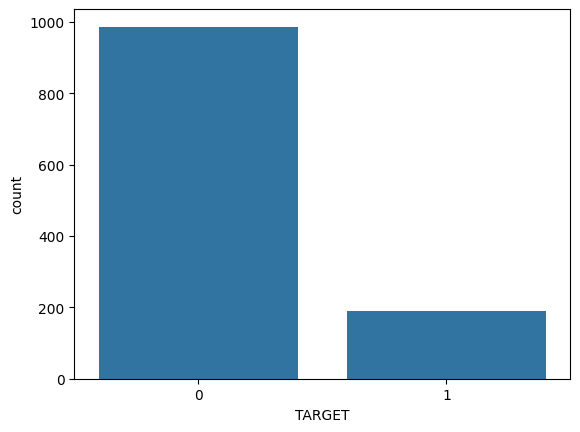

In [43]:
# The distribution of the target (default or not)
sns.countplot(data=train, x="TARGET")
plt.show()